In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
import scikeras
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\aksha\Downloads\forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.drop(['month','day'],axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import Normalizer

In [7]:
norm=Normalizer()

In [8]:
df['size_category']=df['size_category'].astype('category')

In [9]:
df.dtypes

FFMC              float64
DMC               float64
DC                float64
ISI               float64
temp              float64
RH                  int64
wind              float64
rain              float64
area              float64
dayfri              int64
daymon              int64
daysat              int64
daysun              int64
daythu              int64
daytue              int64
daywed              int64
monthapr            int64
monthaug            int64
monthdec            int64
monthfeb            int64
monthjan            int64
monthjul            int64
monthjun            int64
monthmar            int64
monthmay            int64
monthnov            int64
monthoct            int64
monthsep            int64
size_category    category
dtype: object

In [10]:
df['size_category']=df['size_category'].cat.codes
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
df_new=pd.DataFrame(norm.fit_transform(df),columns=df.columns)
df_new

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.613348,0.186424,0.670983,0.036289,0.058346,0.362886,0.047673,0.000000,0.000000,0.007115,...,0.0,0.0,0.0,0.0,0.007115,0.0,0.000000,0.000000,0.0,0.007115
1,0.133784,0.052273,0.988019,0.009893,0.026580,0.048729,0.001329,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.001477,0.0,0.001477
2,0.130322,0.062860,0.988063,0.009638,0.021001,0.047468,0.001870,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.001438,0.0,0.001438
3,0.578783,0.210180,0.489157,0.056805,0.052387,0.612235,0.025247,0.001262,0.000000,0.006312,...,0.0,0.0,0.0,0.0,0.006312,0.0,0.000000,0.000000,0.0,0.006312
4,0.506534,0.290987,0.579706,0.054454,0.064664,0.561555,0.010210,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.005672,0.0,0.000000,0.000000,0.0,0.005672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.121005,0.084081,0.987024,0.002818,0.041225,0.047453,0.004004,0.000000,0.009550,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
513,0.120129,0.083472,0.979879,0.002797,0.032241,0.104524,0.008539,0.000000,0.079924,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
514,0.120520,0.083743,0.983062,0.002806,0.031311,0.103387,0.009896,0.000000,0.016483,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
515,0.147311,0.227833,0.959241,0.017634,0.039949,0.065541,0.006242,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.001561


In [12]:
features=df_new.drop('size_category',axis=1)
features

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.613348,0.186424,0.670983,0.036289,0.058346,0.362886,0.047673,0.000000,0.000000,0.007115,...,0.0,0.0,0.0,0.0,0.0,0.007115,0.0,0.000000,0.000000,0.0
1,0.133784,0.052273,0.988019,0.009893,0.026580,0.048729,0.001329,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.001477,0.0
2,0.130322,0.062860,0.988063,0.009638,0.021001,0.047468,0.001870,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.001438,0.0
3,0.578783,0.210180,0.489157,0.056805,0.052387,0.612235,0.025247,0.001262,0.000000,0.006312,...,0.0,0.0,0.0,0.0,0.0,0.006312,0.0,0.000000,0.000000,0.0
4,0.506534,0.290987,0.579706,0.054454,0.064664,0.561555,0.010210,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.005672,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.121005,0.084081,0.987024,0.002818,0.041225,0.047453,0.004004,0.000000,0.009550,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
513,0.120129,0.083472,0.979879,0.002797,0.032241,0.104524,0.008539,0.000000,0.079924,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
514,0.120520,0.083743,0.983062,0.002806,0.031311,0.103387,0.009896,0.000000,0.016483,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
515,0.147311,0.227833,0.959241,0.017634,0.039949,0.065541,0.006242,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0


In [13]:
target=df[['size_category']]
target

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [14]:
df['size_category'].unique()

array([1, 0], dtype=int8)

<Axes: xlabel='size_category', ylabel='count'>

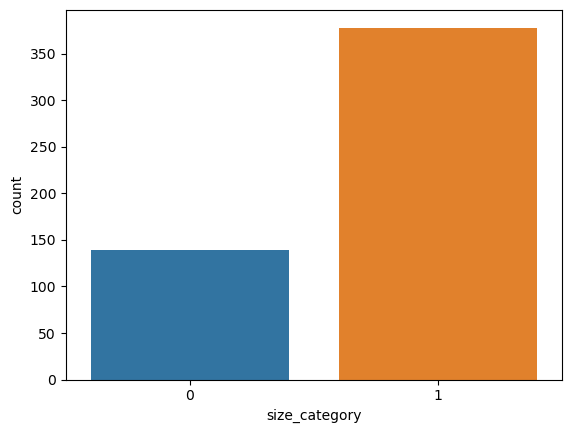

In [15]:
sns.countplot(x='size_category',data=target)

C:\Users\aksha\AppData\Local\Temp\ipykernel_13204\3283317501.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features['FFMC'],rug=True)


<Axes: xlabel='FFMC', ylabel='Density'>

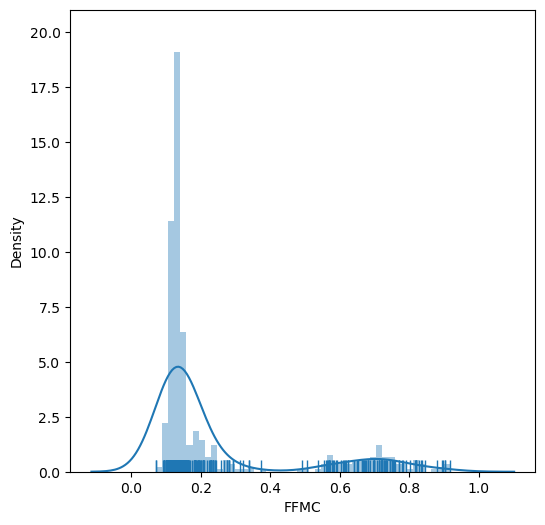

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(features['FFMC'],rug=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_13204\1460681102.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features['DMC'],rug=True)


<Axes: xlabel='DMC', ylabel='Density'>

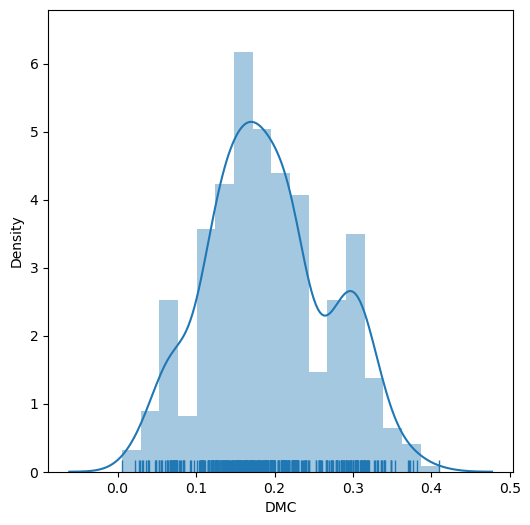

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(features['DMC'],rug=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_13204\852534052.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features['DC'],rug=True)


<Axes: xlabel='DC', ylabel='Density'>

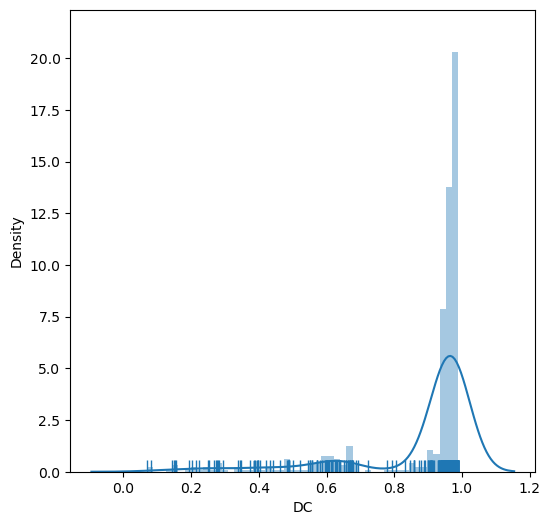

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(features['DC'],rug=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_13204\2686755142.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features['ISI'],rug=True)


<Axes: xlabel='ISI', ylabel='Density'>

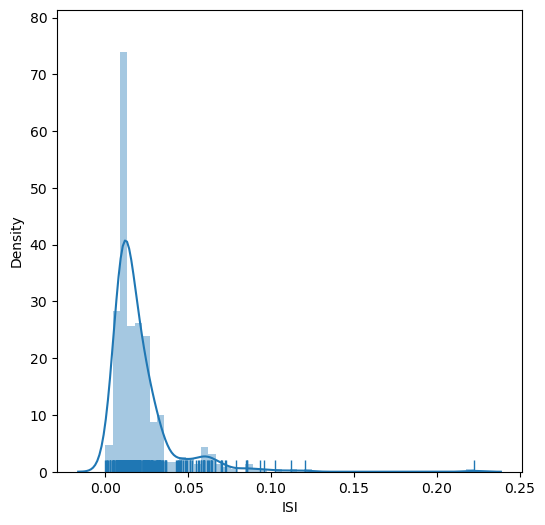

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(features['ISI'],rug=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_13204\76735162.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features['temp'],rug=True)


<Axes: xlabel='temp', ylabel='Density'>

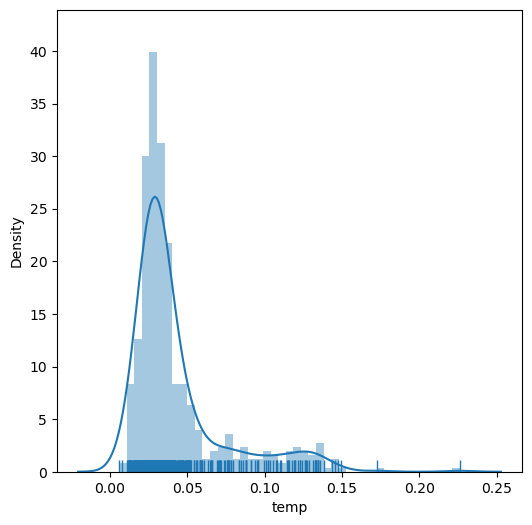

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(features['temp'],rug=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_13204\3792322898.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features['RH'],rug=True)


<Axes: xlabel='RH', ylabel='Density'>

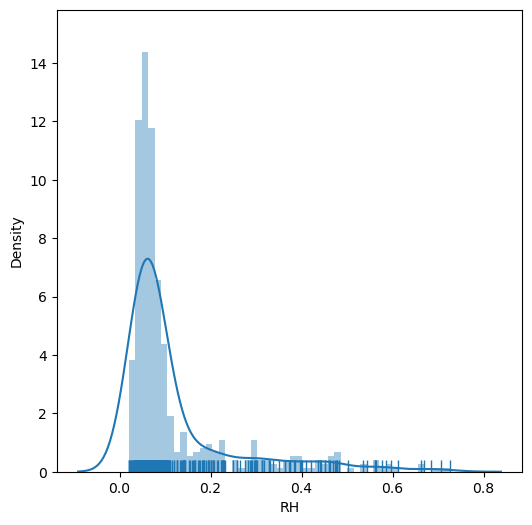

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(features['RH'],rug=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_13204\3398566218.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features['wind'],rug=True)


<Axes: xlabel='wind', ylabel='Density'>

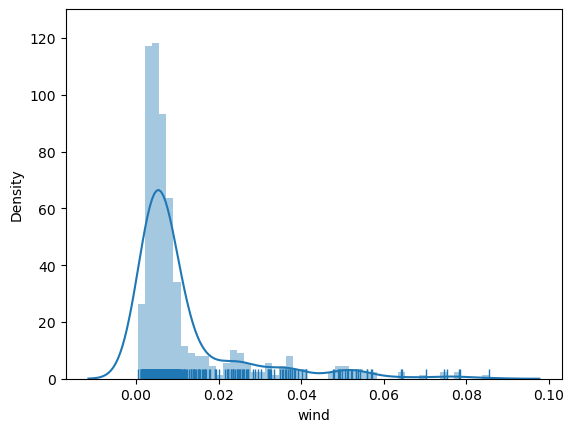

In [22]:
sns.distplot(features['wind'],rug=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_13204\3405270773.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features['rain'],rug=True)


<Axes: xlabel='rain', ylabel='Density'>

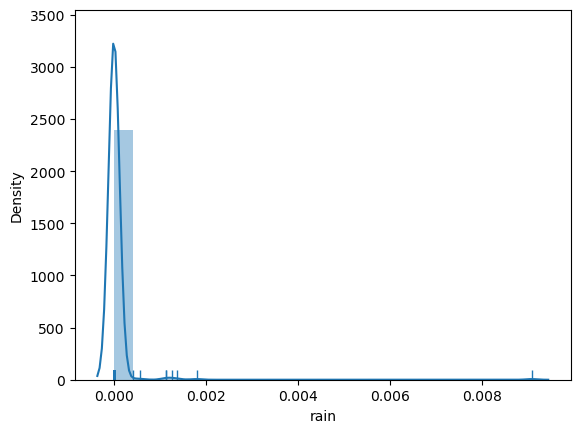

In [23]:
sns.distplot(features['rain'],rug=True)

In [24]:
features1=features.iloc[:,0:9]


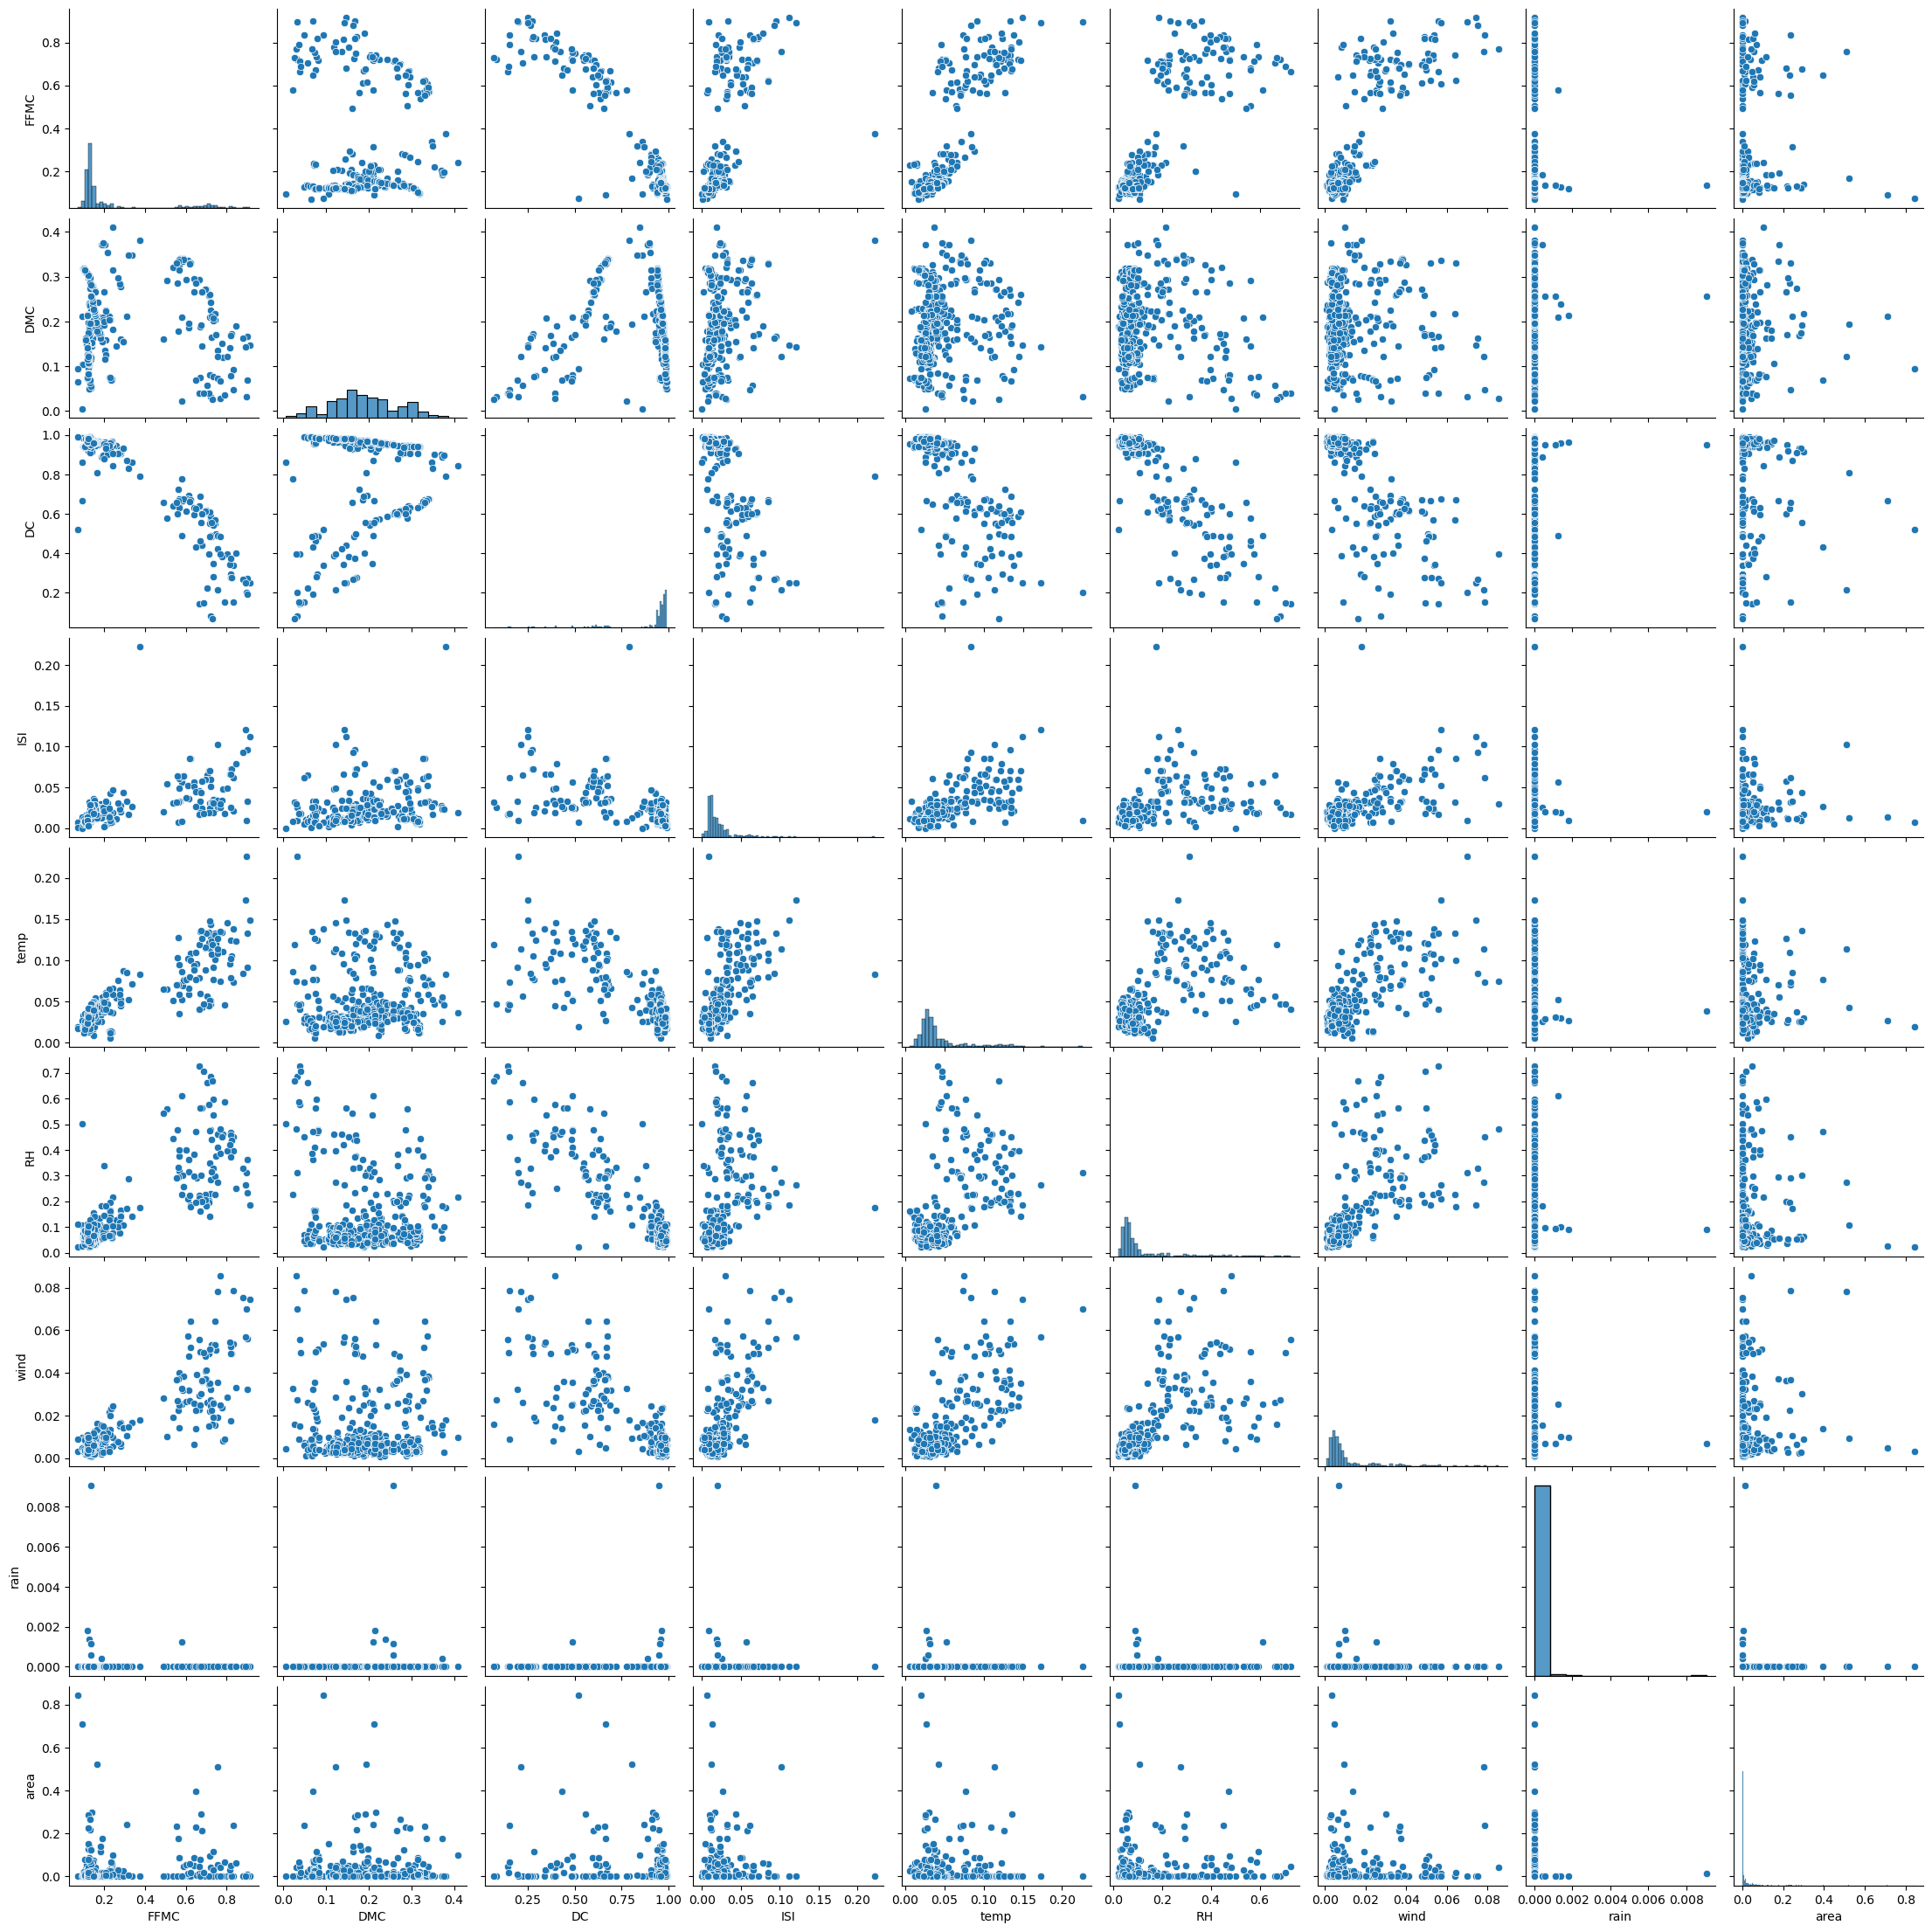

In [25]:
sns.pairplot(data=features1)

In [26]:
corr=df_new.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,-0.015915,-0.940590,0.671131,0.869776,0.838456,0.860370,-0.024742,0.102459,0.349943,...,0.464869,0.071290,-0.040616,0.039118,0.726249,0.102843,0.069846,-0.085085,-0.376072,0.782503
DMC,-0.015915,1.000000,0.067177,0.243392,0.100997,-0.106712,-0.019203,0.057817,-0.019210,-0.000363,...,-0.294220,-0.130240,0.101483,0.218956,0.216913,-0.010139,-0.095846,-0.292211,-0.316394,-0.046270
DC,-0.940590,0.067177,1.000000,-0.596450,-0.762778,-0.887572,-0.805087,0.014305,-0.225407,-0.288285,...,-0.550278,-0.162040,0.072729,0.005742,-0.599981,-0.090647,-0.023874,0.095500,0.339366,-0.734902
ISI,0.671131,0.243392,-0.596450,1.000000,0.657726,0.444088,0.648851,0.005163,0.074310,0.260988,...,0.096864,-0.013774,-0.003505,0.192847,0.592504,0.040822,-0.029046,-0.093691,-0.333607,0.485099
temp,0.869776,0.100997,-0.762778,0.657726,1.000000,0.579701,0.724579,-0.016807,0.082288,0.349977,...,0.297104,-0.007143,0.041228,0.125368,0.687436,0.125640,0.061932,-0.100833,-0.374988,0.718524
RH,0.838456,-0.106712,-0.887572,0.444088,0.579701,1.000000,0.675736,0.008015,0.079117,0.250365,...,0.568135,0.231430,-0.029969,0.044319,0.464870,0.136862,0.036221,-0.086685,-0.339081,0.671846
wind,0.860370,-0.019203,-0.805087,0.648851,0.724579,0.675736,1.000000,-0.012930,0.123385,0.366788,...,0.315195,0.032041,-0.056346,0.020235,0.684407,0.078678,0.066780,-0.079438,-0.337217,0.687428
rain,-0.024742,0.057817,0.014305,0.005163,-0.016807,0.008015,-0.012930,1.000000,-0.015120,0.006859,...,-0.015193,-0.004626,-0.012234,-0.013976,-0.010584,-0.004754,-0.003388,-0.013300,-0.054119,-0.029893
area,0.102459,-0.019210,-0.225407,0.074310,0.082288,0.079117,0.123385,-0.015120,1.000000,0.011413,...,0.079639,-0.018803,0.012459,-0.006082,0.023817,0.117921,-0.013771,-0.032147,-0.042607,-0.209701
dayfri,0.349943,-0.000363,-0.288285,0.260988,0.349977,0.250365,0.366788,0.006859,0.011413,1.000000,...,0.255461,-0.018597,-0.035285,0.015946,0.220739,0.152394,-0.013619,-0.042699,-0.083178,0.302589


<Axes: >

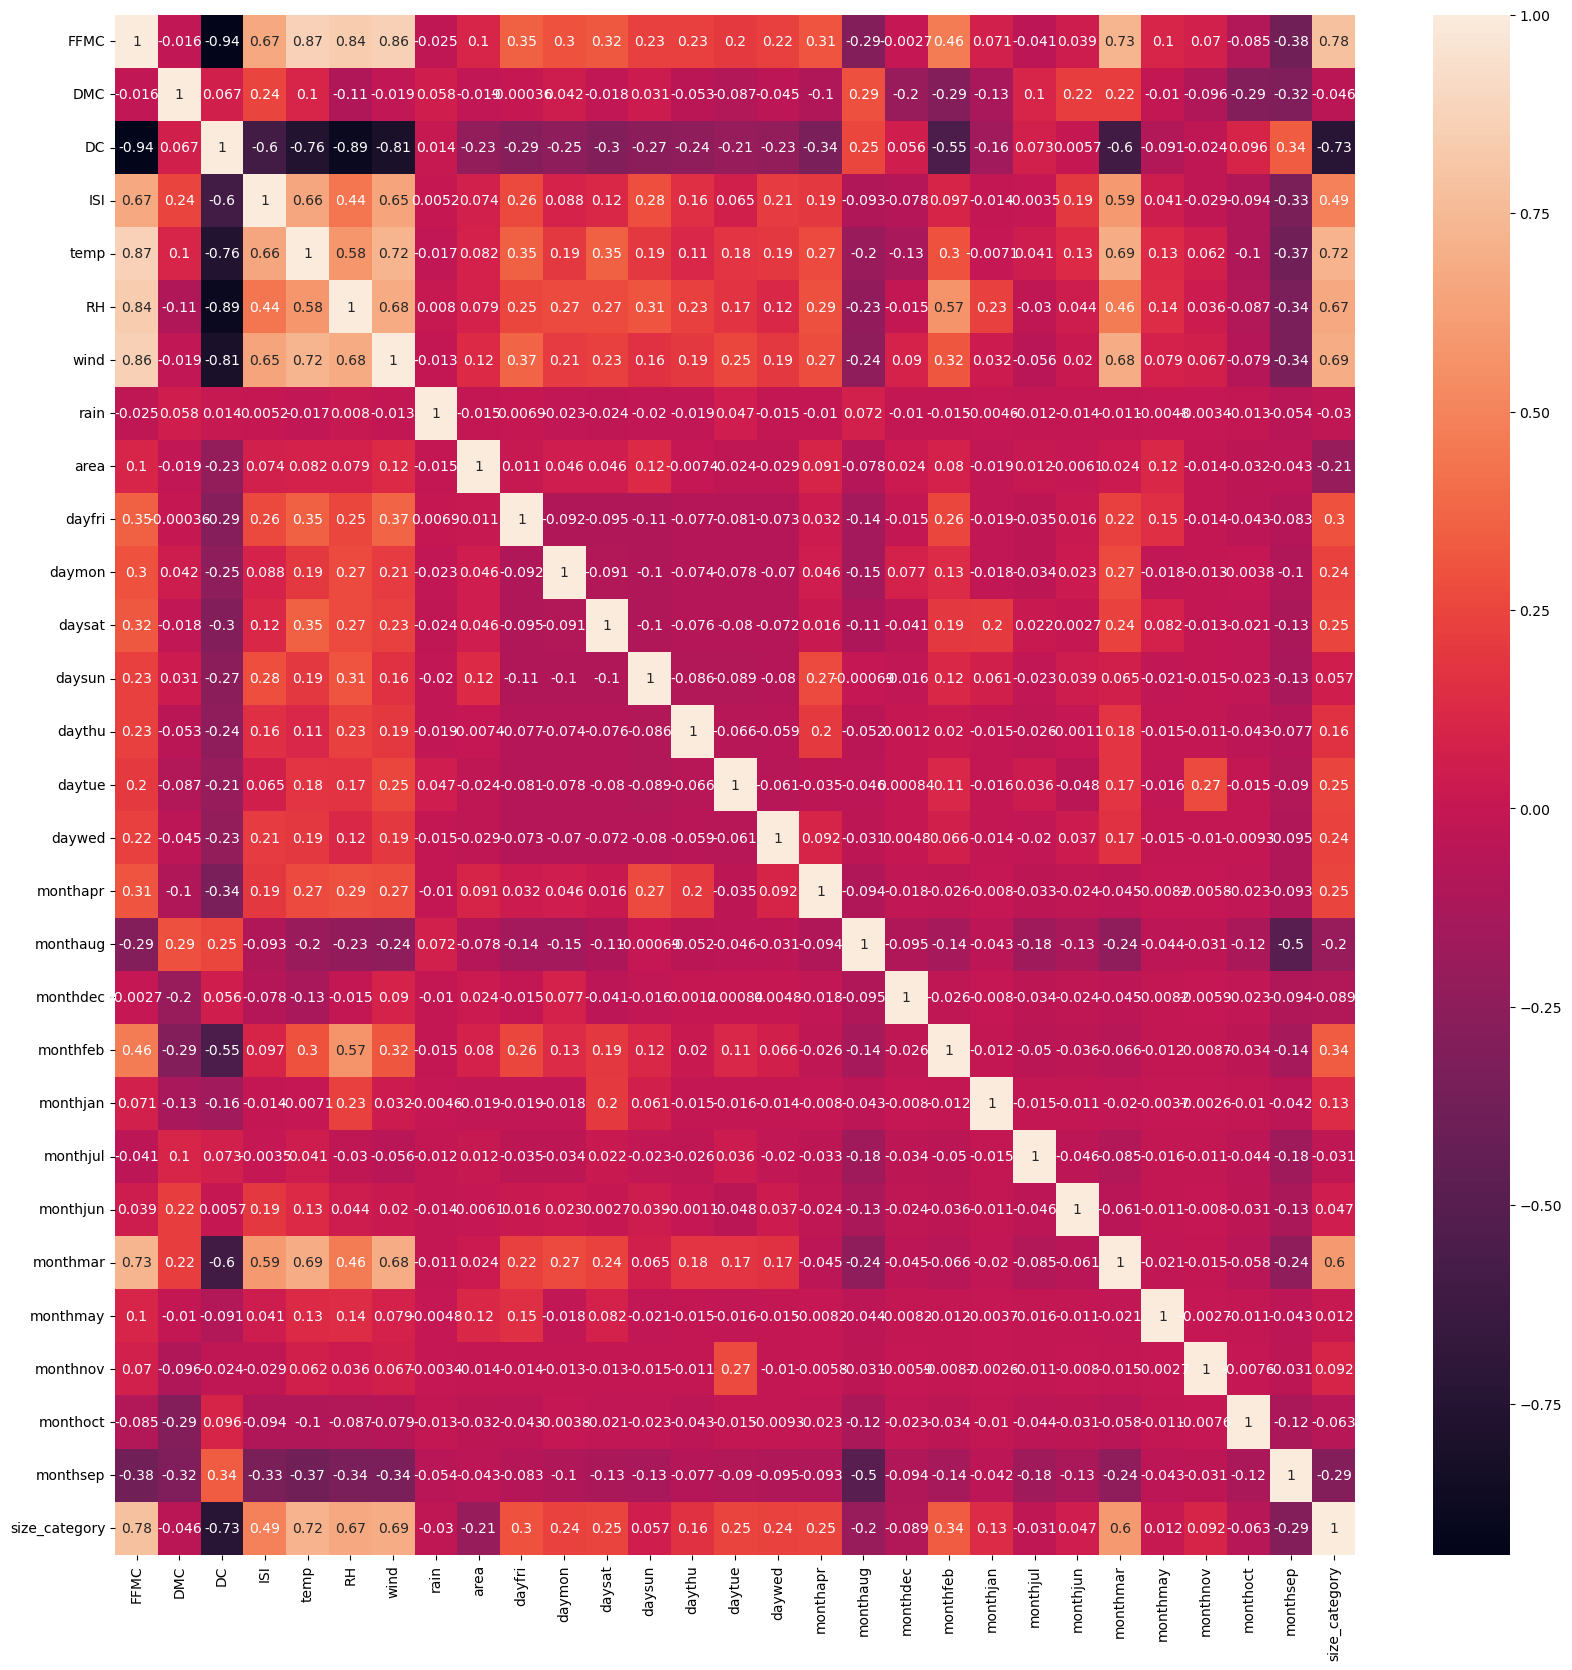

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [28]:
(xtrain,xtest,ytrain,ytest)=train_test_split(features,target,train_size=0.75,random_state=100)

In [29]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(387, 28)
(130, 28)
(387, 1)
(130, 1)


## Model Building 

In [30]:
#parameters
epochs=100
batch_size=10
n_classes=1

In [31]:
28*(2/3)+2#hidden layer1

20.666666666666664

In [32]:
20.666666666666664*(2/3)+2#hidden layer1

15.777777777777775

In [33]:
15.777777777777775*(2/3)+2#hidden layer2

12.518518518518515

In [34]:
12.518518518518515*(2/3)+2#hidden layer3

10.345679012345677

In [35]:
10.345679012345677*(2/3)+2#hidden layer4

8.897119341563783

In [36]:
8.897119341563783*(2/3)+2#hidden layer5

7.931412894375855

In [37]:
7.931412894375855*(2/3)+2#hidden layer6

7.2876085962505694

In [38]:
7.2876085962505694*(2/3)+2#hidden layer7

6.858405730833713

In [39]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop

In [40]:
model=Sequential()
model.add(Dense(20,activation='relu',input_shape=(28, )))
model.add(Dense(15,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                580       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 12)                192       
                                                                 
 dense_3 (Dense)             (None, 10)                130       
                                                                 
 dense_4 (Dense)             (None, 6)                 66        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1290 (5.04 KB)
Trainable params: 1290 (5.

In [41]:
model.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics='accuracy')

In [42]:
history=model.fit(xtrain,ytrain,epochs=epochs,batch_size=batch_size,validation_data=(xtest,ytest),verbose=2)

Epoch 1/100


39/39 - 3s - loss: 0.6611 - accuracy: 0.7287 - val_loss: 0.6267 - val_accuracy: 0.7385 - 3s/epoch - 68ms/step
Epoch 2/100
39/39 - 0s - loss: 0.6105 - accuracy: 0.7287 - val_loss: 0.5860 - val_accuracy: 0.7385 - 183ms/epoch - 5ms/step
Epoch 3/100
39/39 - 0s - loss: 0.5854 - accuracy: 0.7287 - val_loss: 0.5732 - val_accuracy: 0.7385 - 180ms/epoch - 5ms/step
Epoch 4/100
39/39 - 0s - loss: 0.5787 - accuracy: 0.7287 - val_loss: 0.5707 - val_accuracy: 0.7385 - 173ms/epoch - 4ms/step
Epoch 5/100
39/39 - 0s - loss: 0.5775 - accuracy: 0.7287 - val_loss: 0.5699 - val_accuracy: 0.7385 - 174ms/epoch - 4ms/step
Epoch 6/100
39/39 - 0s - loss: 0.5758 - accuracy: 0.7287 - val_loss: 0.5679 - val_accuracy: 0.7385 - 179ms/epoch - 5ms/step
Epoch 7/100
39/39 - 0s - loss: 0.5733 - accuracy: 0.7287 - val_loss: 0.5660 - val_accuracy: 0.7385 - 167ms/epoch - 4ms/step
Epoch 8/100
39/39 - 0s - loss: 0.5707 - accuracy: 0.7287 - val_loss: 0.5642 - val_accuracy: 0.7385 - 188ms/epoch - 5ms/step
Epoch 9/

In [43]:
score=model.evaluate(xtest,ytest)

5/5 [==============================] - 0s 7ms/step - loss: 0.0749 - accuracy: 0.9692


In [44]:
print('loss is',score[0])
print('accuracy is',score[1])

loss is 0.07491596043109894
accuracy is 0.9692307710647583


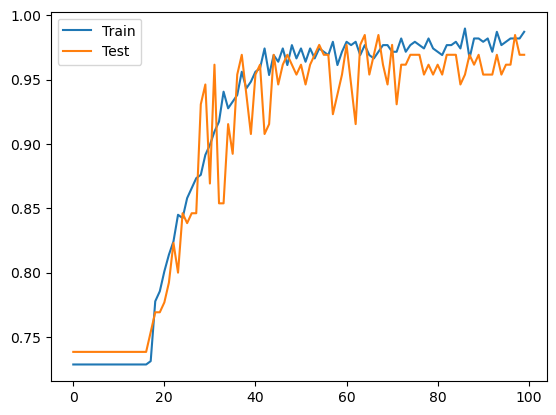

In [45]:
#accuracy in train vs accuracy test
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Test')
plt.legend()

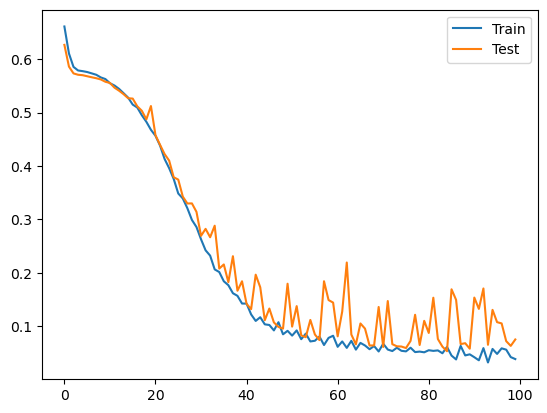

In [46]:
#loss in training vs loss in testing
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.legend()

In [59]:
ypredt=model.predict(xtest)

5/5 [==============================] - 0s 7ms/step


In [60]:
ypredt

array([[2.10715365e-03],
       [2.10252907e-02],
       [9.99993443e-01],
       [9.99984741e-01],
       [9.99988019e-01],
       [9.99989986e-01],
       [1.19169871e-03],
       [1.00000000e+00],
       [3.23523767e-03],
       [1.00000000e+00],
       [9.99790013e-01],
       [2.45684315e-03],
       [9.99629200e-01],
       [9.94190812e-01],
       [9.99689639e-01],
       [9.99596417e-01],
       [9.99919534e-01],
       [9.99853790e-01],
       [9.99459445e-01],
       [6.39004171e-01],
       [1.00000000e+00],
       [9.99949396e-01],
       [3.63955260e-05],
       [9.99982715e-01],
       [9.99979436e-01],
       [9.99974549e-01],
       [9.99941945e-01],
       [1.00000000e+00],
       [8.30140114e-01],
       [1.00000000e+00],
       [9.99974251e-01],
       [9.99977291e-01],
       [9.99878764e-01],
       [9.99996364e-01],
       [7.55256740e-04],
       [7.87083991e-03],
       [1.00000000e+00],
       [9.99983788e-01],
       [3.80846560e-02],
       [9.98011529e-01],


In [61]:
ypredt.shape

(130, 1)

In [62]:
ytest.shape

(130, 1)

In [63]:
max=[]
for i in range(len(ypredt)):
    max.append(np.argmax(ypredt[i]))
max

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

(array([28.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  2., 96.]),
 array([6.01625402e-07, 1.00000538e-01, 2.00000480e-01, 3.00000429e-01,
        4.00000364e-01, 5.00000298e-01, 6.00000262e-01, 7.00000167e-01,
        8.00000131e-01, 9.00000036e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

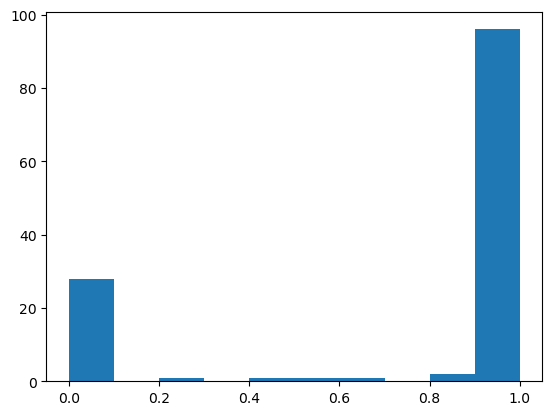

In [64]:
plt.hist(ypredt)

(array([34.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 96.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

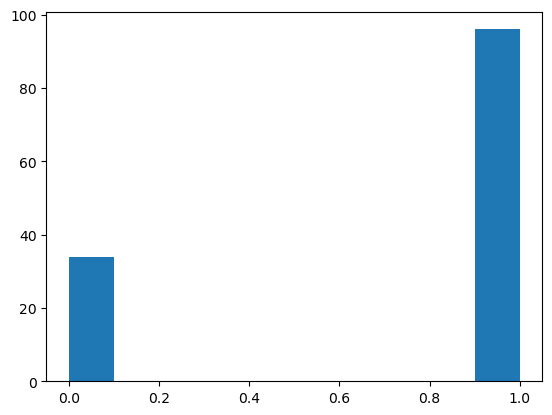

In [65]:
plt.hist(ytest)